In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import seaborn as sns
import scipy

from numpy.linalg import matrix_power
from numpy.linalg import solve

from statsmodels.distributions.empirical_distribution import ECDF

matplotlib.style.use('ggplot')

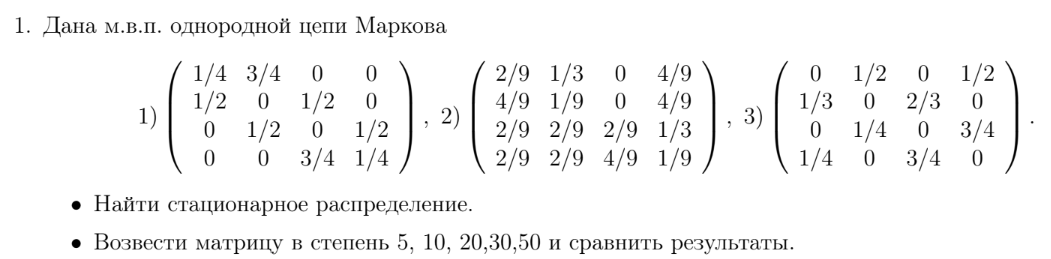

In [2]:
def stationary_solve(matrix, n):
    matrix = matrix.transpose() - np.identity(n)
    
    #В силу стохастичности матрица вырождена, поэтому удалим одну строку и один столбец
    #pi1 = 1
    
    matrix = np.matrix(np.delete(matrix, 0, 0))
    b = -matrix[:, 0]
    matrix = np.matrix(np.delete(matrix, 0, 1))
    
    solution = np.linalg.solve(matrix, b)
    solution = np.insert(solution, 0, 1)
    solution /= np.sum(solution)
    
    return solution

In [60]:
matrix = np.array([[1/4, 3/4, 0, 0], [1/2, 0, 1/2, 0], [0, 1/2, 0, 1/2], [0, 0, 3/4, 1/4]])
print("Стационарное распределение: \n")
print(*stationary_solve(matrix, 4).tolist())
print('\n')

for i in [5, 10, 20, 30, 50]:
    print("Степень ", i)
    print(matrix_power(matrix, i))
    print('\n')

Стационарное распределение: 

[0.2, 0.3, 0.3, 0.2]


Степень  5
[[0.17675781 0.43066406 0.16992188 0.22265625]
 [0.28710938 0.14648438 0.453125   0.11328125]
 [0.11328125 0.453125   0.14648438 0.28710938]
 [0.22265625 0.16992188 0.43066406 0.17675781]]


Степень  10
[[0.22371578 0.25403881 0.34596062 0.17628479]
 [0.16935921 0.36967659 0.23032379 0.23064041]
 [0.23064041 0.23032379 0.36967659 0.16935921]
 [0.17628479 0.34596062 0.25403881 0.22371578]]


Степень  20
[[0.20394139 0.29141525 0.30858475 0.19605861]
 [0.19427683 0.31252614 0.28747386 0.20572317]
 [0.20572317 0.28747386 0.31252614 0.19427683]
 [0.19605861 0.30858475 0.29141525 0.20394139]]


Степень  30
[[0.20071303 0.29844139 0.30155861 0.19928697]
 [0.19896093 0.30227164 0.29772836 0.20103907]
 [0.20103907 0.29772836 0.30227164 0.19896093]
 [0.19928697 0.30155861 0.29844139 0.20071303]]


Степень  50
[[0.20002346 0.29994871 0.30005129 0.19997654]
 [0.19996581 0.30007475 0.29992525 0.20003419]
 [0.20003419 0.29992525 0.3000

In [62]:
matrix = np.array([[2/9, 1/3, 0, 4/9], [4/9, 1/9, 0, 4/9], [2/9, 2/9, 2/9, 1/3], [2/9, 2/9, 4/9, 1/9]])
print("Стационарное распределение: \n")
print(*stationary_solve(matrix, 4).tolist())
print('\n')

for i in [5, 10, 20, 30, 50]:
    print("Степень ", i)
    print(matrix_power(matrix, i))
    print('\n')

Стационарное распределение: 

[0.2727272727272727, 0.22727272727272727, 0.1818181818181818, 0.3181818181818182]


Степень  5
[[0.27251943 0.22748903 0.18154414 0.31844739]
 [0.27306136 0.22694711 0.18154414 0.31844739]
 [0.27268878 0.22730275 0.18174736 0.31826111]
 [0.27268878 0.22730275 0.18228929 0.31771918]]


Степень  10
[[0.27272739 0.22727261 0.18181832 0.31818168]
 [0.27272709 0.22727291 0.18181832 0.31818168]
 [0.27272729 0.22727271 0.18181823 0.31818177]
 [0.27272729 0.22727271 0.18181793 0.31818207]]


Степень  20
[[0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]]


Степень  30
[[0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.22727273 0.18181818 0.31818182]]


Степень  50
[[0.27272727 0.22727273 0.18181818 0.31818182]
 [0.27272727 0.2

In [64]:
matrix = np.array([[0, 1/2, 0, 1/2], [1/3, 0, 2/3, 0], [0, 1/4, 0, 3/4], [1/4, 0, 3/4, 0]])
print("Стационарное распределение: \n")
print(*stationary_solve(matrix, 4).tolist())
print('\n')

for i in [5, 10, 20, 30, 50]:
    print("Степень ", i)
    print(matrix_power(matrix, i))
    print('\n')

Стационарное распределение: 

[0.13829787234042556, 0.15957446808510642, 0.36170212765957444, 0.3404255319148936]


Степень  5
[[0.         0.31922743 0.         0.68077257]
 [0.27662037 0.         0.72337963 0.        ]
 [0.         0.31911892 0.         0.68088108]
 [0.2765842  0.         0.7234158  0.        ]]


Степень  10
[[0.27659575 0.         0.72340425 0.        ]
 [0.         0.31914894 0.         0.68085106]
 [0.27659574 0.         0.72340426 0.        ]
 [0.         0.31914893 0.         0.68085107]]


Степень  20
[[0.27659574 0.         0.72340426 0.        ]
 [0.         0.31914894 0.         0.68085106]
 [0.27659574 0.         0.72340426 0.        ]
 [0.         0.31914894 0.         0.68085106]]


Степень  30
[[0.27659574 0.         0.72340426 0.        ]
 [0.         0.31914894 0.         0.68085106]
 [0.27659574 0.         0.72340426 0.        ]
 [0.         0.31914894 0.         0.68085106]]


Степень  50
[[0.27659574 0.         0.72340426 0.        ]
 [0.         0

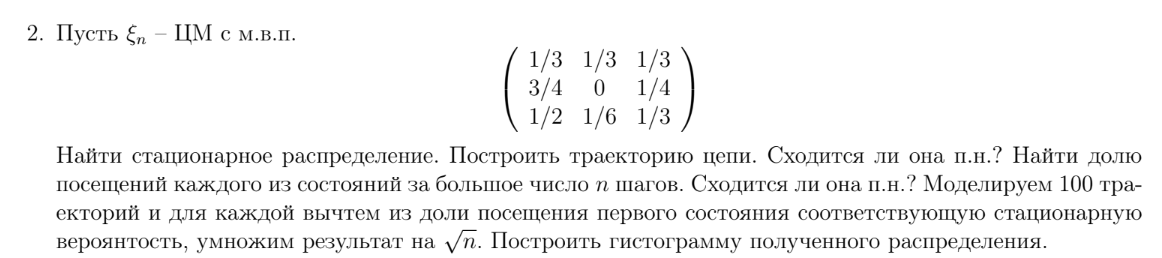

In [7]:
matrix = np.array([[1/3, 1/3, 1/3], [3/4, 0, 1/4], [1/2, 1/6, 1/3]])

print("Стационарное распределение: ")
print(*stationary_solve(matrix, 3).tolist()[0])

#Пусть всегда стартуем с первого состояния
s = [0]
for i in range(19):
    p = matrix[s[-1]]
    s.append(int(np.random.choice([0, 1, 2], 1, p=p)[0]))

print('\nТраектория: ')
print(*s)

#Доля посещений
s = [0]
freq = [1, 0, 0]
n = 300
for i in range(n):
    p = matrix[s[-1]]
    s.append(int(np.random.choice([0, 1, 2], 1, p=p)[0]))
    freq[s[-1]] += 1
    
freq = np.array(freq)
freq = freq * (1/n)

print('\nЧастоты:')
print(*freq.tolist())

Стационарное распределение: 
0.4736842105263159 0.2105263157894737 0.3157894736842105

Траектория: 
0 0 2 2 0 2 2 2 1 2 2 1 2 0 0 1 0 2 0 1

Частоты:
0.4766666666666667 0.19666666666666668 0.33


[0.4736842105263159, 0.2105263157894737, 0.3157894736842105]
[-0.1165049664272596, -0.4011099558424122, 0.6740644486148359, 0.484327789004733, 0.29459112939463006, 0.10485446978452714, -0.5592238388508314, -0.4959782856474637, 0.5159505656064168, -0.3378644026390446, -0.021636636622208136, -1.0968110410794563, -0.1481277430289434, 0.42108223580136533, 0.3578366825979977, -0.36948717924072844, -0.08488218982557579, 0.041608916581159505, -0.2113732962323093, -0.1165049664272596, 0.009986139979475683, -0.08488218982557579, -0.1797505196306255, 0.642441672013152, 0.009986139979475683, -0.1481277430289434, -0.05325941322389196, 0.19972279958957861, 0.29459112939463006, -0.36948717924072844, -0.24299607283399313, 0.13647724638621098, 0.5475733422081006, 0.13647724638621098, 0.23134557619126242, -0.2113732962323093, 0.3262139059963139, 0.10485446978452714, -0.1797505196306255, 0.19972279958957861, 0.041608916581159505, 0.13647724638621098, -0.1481277430289434, 0.29459112939463006, 0.136477246

(array([ 1.,  2., 11., 18., 26., 23., 13.,  4.,  0.,  2.]),
 array([-1.09681104, -0.86280249, -0.62879395, -0.3947854 , -0.16077685,
         0.07323169,  0.30724024,  0.54124879,  0.77525733,  1.00926588,
         1.24327443]),
 <BarContainer object of 10 artists>)

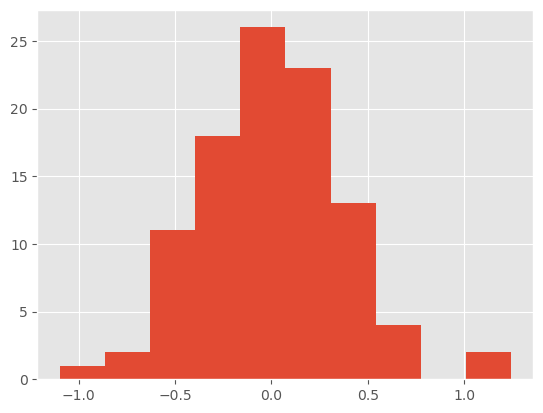

In [26]:
ans = []
pi = stationary_solve(matrix, 3).tolist()[0]
print(pi)
for j in range(100):
    s = 0
    freq = 1
    for i in range(1000):
        p = matrix[s]
        s = int(np.random.choice([0, 1, 2], 1, p=p)[0])
        if s == 0:
            freq += 1
            
    ans.append((1000**0.5) * (freq/1000 - pi[0]))

print(ans)
    
plt.hist(ans)

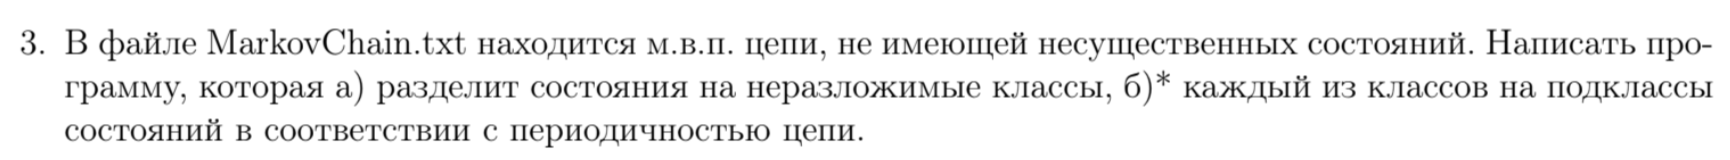

In [49]:
data = pd.read_csv('MarkovChain.txt', sep=';')

data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.39,0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48
0,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0,0.000000
1,0,0.0,0.000000,0,0,0.166667,0.00,0.000000,0.00,0.166667,...,0.00,0.0,0.000000,0.166667,0.000000,0.00,0.0,0.000000,0,0.000000
2,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.0,0.000000,0.000000,0.111111,0.00,0.0,0.111111,0,0.111111
3,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0,0.000000
4,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.5,0.000000,0,0.000000
5,0,0.0,0.111111,0,0,0.000000,0.00,0.111111,0.00,0.000000,...,0.00,0.0,0.111111,0.000000,0.000000,0.00,0.0,0.000000,0,0.000000
6,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.25,0.0,0.000000,0.000000,0.000000,0.25,0.0,0.000000,0,0.000000
7,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.00,0.0,0.000000,0.000000,0.111111,0.00,0.0,0.111111,0,0.111111
8,0,0.0,0.000000,0,0,0.000000,0.00,0.000000,0.00,0.000000,...,0.25,0.0,0.000000,0.000000,0.000000,0.25,0.0,0.000000,0,0.000000
9,0,0.0,0.111111,0,0,0.000000,0.00,0.111111,0.00,0.000000,...,0.00,0.0,0.111111,0.000000,0.000000,0.00,0.0,0.000000,0,0.000000


In [57]:
#преобразуем data в двумерный массив
P = np.matrix(data)
print(P)

#заполняем словарь
#ключ состояние - значение номер класса
d = {}
for i in range(50):
    d[i] = 0

#реккурентное построение цепи
def classify(i, curr_class, d, P):
    print('Состояние ', i, ' попадает в класс ', curr_class)
    d[i] = curr_class
    for j in range(50):
        if P[i, j] != 0 and d[j] == 0:
            classify(j, curr_class, d, P)
    return

curr_class = 0
for i in range(50):
    if d[i] == 0:
        curr_class += 1
        classify(i, curr_class, d, P)
        print('---------')

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.11111111 0.         0.11111111]
 ...
 [0.         0.2        0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2        0.         ... 0.         0.         0.        ]]
Состояние  0  попадает в класс  1
Состояние  37  попадает в класс  1
---------
Состояние  1  попадает в класс  2
Состояние  5  попадает в класс  2
Состояние  2  попадает в класс  2
Состояние  10  попадает в класс  2
Состояние  14  попадает в класс  2
Состояние  9  попадает в класс  2
Состояние  7  попадает в класс  2
Состояние  12  попадает в класс  2
Состояние  26  попадает в класс  2
Состояние  11  попадает в класс  2
Состояние  13  попадает в класс  2
Состояние  15  попадает в класс  2
Состояние  28  попадает в класс  2
Состояние  20  попадает в к

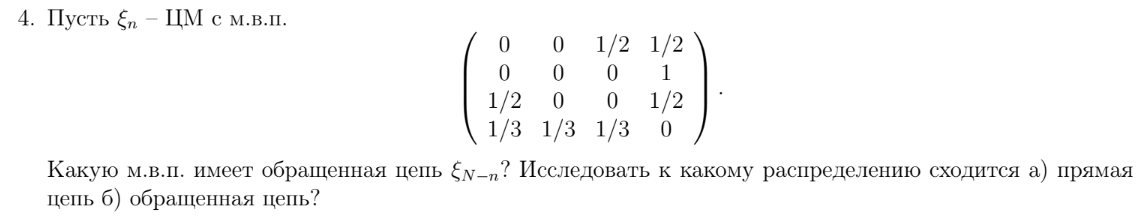

In [82]:
def stationary_solve(matrix, n):
    matrix = matrix.transpose() - np.identity(n)
    
    #В силу стохастичности матрица вырождена, поэтому удалим одну строку и один столбец
    #pi1 = 1
    
    matrix = np.matrix(np.delete(matrix, 0, 0))
    b = -matrix[:, 0]
    matrix = np.matrix(np.delete(matrix, 0, 1))
    
    solution = np.linalg.solve(matrix, b)
    solution = np.insert(solution, 0, 1)
    solution /= np.sum(solution)
    
    return solution

P = np.matrix([[0,0,0.5,0.5],
   [0,0,0,1],
   [0.5,0,0,0.5],
   [1/3,1/3,1/3,0]])

pi = stationary_solve(P, 4)

P_inv = []
for i in range(4):
    P_inv.append([])
    for j in range(4):
        P_inv[i].append(P[j,i]*pi[0, j]/pi[0, i])
        
P_inv = np.matrix(P_inv)
pi_inv = stationary_solve(P_inv, 4)[0][0]

print(pi)
print(pi_inv)

print(P)
print(P_inv)

[[0.25  0.125 0.25  0.375]]
[[0.25  0.125 0.25  0.375]]
[[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]
[[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


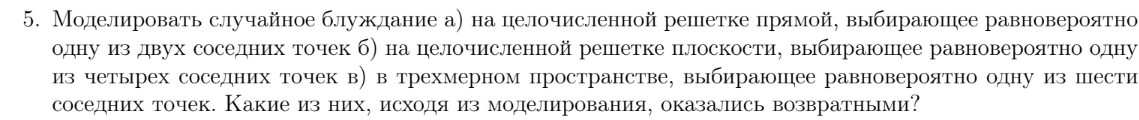

In [20]:
#a)
for i in range(10):
    state = 0
    flag = False
    for j in range(10000):
        p = np.random.randint(2)
        if p == 0:
            state -= 1
        else:
            state += 1
        if state == 0:
            print('Блуждание номер ', i, ' возвратно')
            flag = True
            break
    if flag == False:
        print('Блуждание номер ', i, ' невозвратно')

Блуждание номер  0  возвратно
Блуждание номер  1  возвратно
Блуждание номер  2  возвратно
Блуждание номер  3  возвратно
Блуждание номер  4  возвратно
Блуждание номер  5  возвратно
Блуждание номер  6  возвратно
Блуждание номер  7  возвратно
Блуждание номер  8  возвратно
Блуждание номер  9  возвратно


In [24]:
#б)
for i in range(10):
    state = [0, 0]
    flag = False
    for j in range(10000):
        p = np.random.randint(4)
        if p == 0:
            state[0] -= 1
        elif p == 1:
            state[0] += 1
        elif p == 2:
            state[1] -= 1
        else:
            state[1] += 1
            
        if state == [0, 0]:
            print('Блуждание номер ', i, ' возвратно')
            flag = True
            break
            
    if flag == False:
        print('Блуждание номер ', i, ' невозвратно')

Блуждание номер  0  возвратно
Блуждание номер  1  возвратно
Блуждание номер  2  возвратно
Блуждание номер  3  возвратно
Блуждание номер  4  возвратно
Блуждание номер  5  возвратно
Блуждание номер  6  возвратно
Блуждание номер  7  невозвратно
Блуждание номер  8  возвратно
Блуждание номер  9  возвратно


In [28]:
for i in range(20):
    state = [0, 0, 0]
    flag = False
    for j in range(10000):
        p = np.random.randint(6)
        if p == 0:
            state[0] -= 1
        elif p == 1:
            state[0] += 1
        elif p == 2:
            state[1] -= 1
        elif p == 3:
            state[1] += 1
        elif p == 4:
            state[2] -= 1
        else:
            state[2] += 1
            
        if state == [0, 0, 0]:
            print('Блуждание номер ', i, ' возвратно')
            flag = True
            break
            
    if flag == False:
        print('Блуждание номер ', i, ' невозвратно')

Блуждание номер  0  невозвратно
Блуждание номер  1  невозвратно
Блуждание номер  2  возвратно
Блуждание номер  3  невозвратно
Блуждание номер  4  возвратно
Блуждание номер  5  невозвратно
Блуждание номер  6  невозвратно
Блуждание номер  7  возвратно
Блуждание номер  8  невозвратно
Блуждание номер  9  невозвратно
Блуждание номер  10  возвратно
Блуждание номер  11  возвратно
Блуждание номер  12  невозвратно
Блуждание номер  13  невозвратно
Блуждание номер  14  невозвратно
Блуждание номер  15  невозвратно
Блуждание номер  16  невозвратно
Блуждание номер  17  невозвратно
Блуждание номер  18  невозвратно
Блуждание номер  19  невозвратно
